In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Function to get DataFrames from a specific treatment and day
def get_dataframes(treatment_folder, day_folder):

    folder_path = os.path.join(treatment_folder, day_folder)
    
    # Initialize a list to store the DataFrames
    dataframes = []
    print(os.listdir(folder_path))

    # Traverse the folder and read the xlsx files
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            file_path = os.path.join(folder_path, file_name)
            df = pd.read_csv(file_path)
            dataframes.append(df)
    
    return dataframes

def process_treatment_file(treatment_folder):
    

    # Find the only .xlsx file in the treatment folder
    file_path = None
    for file_name in os.listdir(treatment_folder):
        if file_name.endswith('.xlsx'):
            file_path = os.path.join(treatment_folder, file_name)
            break
    
    if file_path is None:
        raise FileNotFoundError(f"No .xlsx file found in {treatment_folder}")
    
    # Read the Excel file into a DataFrame
    df = pd.read_excel(file_path)

    # Add 'LAB' before each number in the columns 'id_day1' and 'id_day2'
    df['id_day1'] = df['id_day1'].apply(lambda x: f'LAB{x}')
    df['id_day2'] = df['id_day2'].apply(lambda x: f'LAB{x}')
    
    return df

In [4]:
treatment_folders = ['baseline_s1','baseline_s2','noaccept_s2','noaccept_s3','nowork_s1','nowork_s2']
day_folders = ['Day1', 'Day2']
treatment_index = 3
d1_invest,d1_time,d1_summary,d1_survey = get_dataframes(treatment_folders[treatment_index], day_folders[0])
d2_invest,d2_time,d2_summary,d2_survey = get_dataframes(treatment_folders[treatment_index], day_folders[1])
ids = process_treatment_file(treatment_folders[treatment_index])

['investment_2024-10-08.csv', 'PageTimes-2024-10-08.csv', 'summary_2024-10-08.csv', 'survey_2024-10-08.csv']
['investment_2024-10-10.csv', 'PageTimes-2024-10-10.csv', 'summary_2024-10-10.csv', 'survey_2024-10-10.csv']


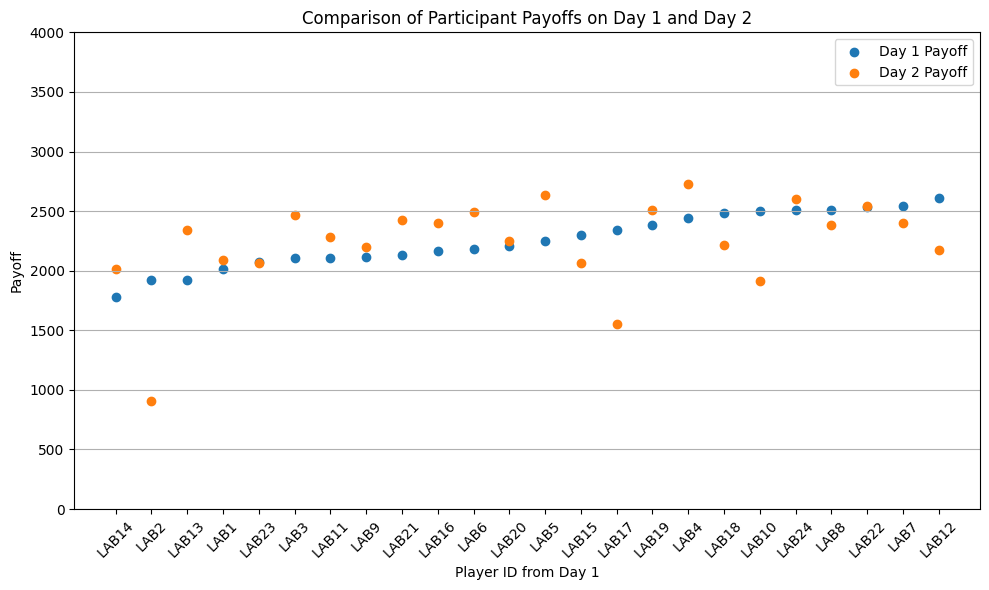

In [5]:
d1_summary_merged = pd.merge(d1_summary, ids, left_on='participant.label', right_on='id_day1')
d2_summary_merged = pd.merge(d2_summary, ids, left_on='participant.label', right_on='id_day2')

# Merge the two summaries to align payoffs for the same players
comparison_df = pd.merge(d1_summary_merged[['id_day1', 'participant.payoff']],
                         d2_summary_merged[['id_day1', 'participant.payoff']],
                         on='id_day1',
                         suffixes=('_day1', '_day2'))

comparison_df = comparison_df.sort_values(by='participant.payoff_day1')

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df['id_day1'], comparison_df['participant.payoff_day1'], label='Day 1 Payoff', marker='o')
plt.scatter(comparison_df['id_day1'], comparison_df['participant.payoff_day2']+1800, label='Day 2 Payoff', marker='o')

plt.xlabel('Player ID from Day 1')
plt.ylabel('Payoff')
plt.ylim(0,4000)
plt.title('Comparison of Participant Payoffs on Day 1 and Day 2')
plt.legend()
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [6]:
auto_data=pd.read_csv('LP_student_results_autoaccept.csv')
other_data=pd.read_csv('LP_student_results.csv')
new_data=pd.read_csv('LP_new_run_autoaccept.csv')
total_data=pd.merge(pd.merge(auto_data,other_data,how='outer'),new_data,how='outer')
total_data['Treatment'] = total_data['Group'].str.split('_').str[0]
total_data = total_data[total_data['Group'] != 'noaccept_s1'].reset_index(drop=True)
total_data['Efficiency']=total_data['Participant_Earnings']/total_data['Optimal']
total_data

,Group,Day,session_id,Optimal,Participant_Earnings,Treatment,Efficiency
0,baseline_s1,Day 1,1,2071.0,1895.0,baseline,0.915017
1,baseline_s1,Day 1,2,2310.0,1940.0,baseline,0.839827
2,baseline_s1,Day 1,3,2623.0,2617.0,baseline,0.997713
3,baseline_s1,Day 1,4,2530.0,2522.0,baseline,0.996838
4,baseline_s1,Day 1,5,2161.0,2161.0,baseline,1.000000
...,...,...,...,...,...,...,...
273,nowork_s2,Day 2,18,2430.0,2411.0,nowork,0.992181
274,nowork_s2,Day 2,19,2264.0,2224.0,nowork,0.982332
275,nowork_s2,Day 2,20,2269.0,2217.0,nowork,0.977082
276,nowork_s2,Day 2,21,2509.0,2423.0,nowork,0.965723


In [32]:
group_auto=auto_data.groupby(['Group','Day'])
group_auto.last()

session_id  Optimal  Participant_Earnings  Efficiency
Group       Day                                                         
noaccept_s1 Day 1          24   3289.0                1400.0    0.425661
            Day 2          22   2339.0                2330.0    0.996152
noaccept_s2 Day 1          22   3110.0                2128.0    0.684244
            Day 2          20   2817.0                1909.0    0.677671

In [28]:
group_other=other_data.groupby(['Group','Day'])
group_other.last()

session_id  Optimal  Participant_Earnings
Group       Day                                             
baseline_s1 Day 1          23   2137.0                2060.0
            Day 2          23   2394.0                2389.0
baseline_s2 Day 1          24   2107.0                2049.0
            Day 2          24   1895.0                1880.0
nowork_s1   Day 1          24   2380.0                2368.0
            Day 2          24   2564.0                2206.0
nowork_s2   Day 1          24   2301.0                2178.0
            Day 2          22   2069.0                2052.0

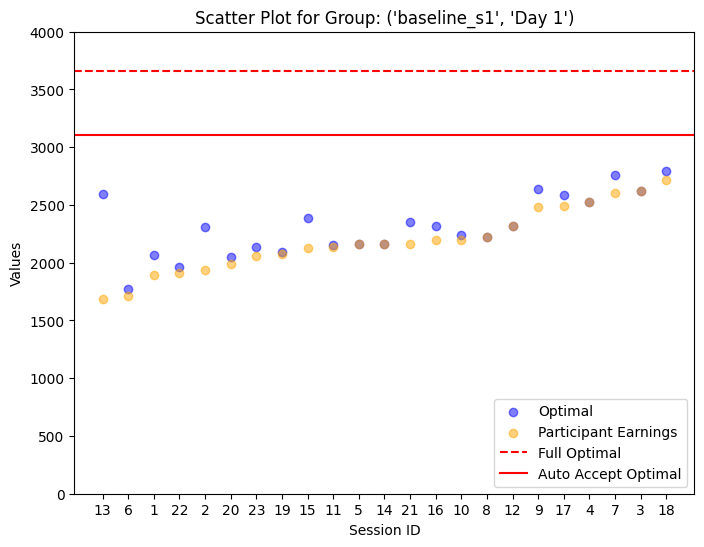

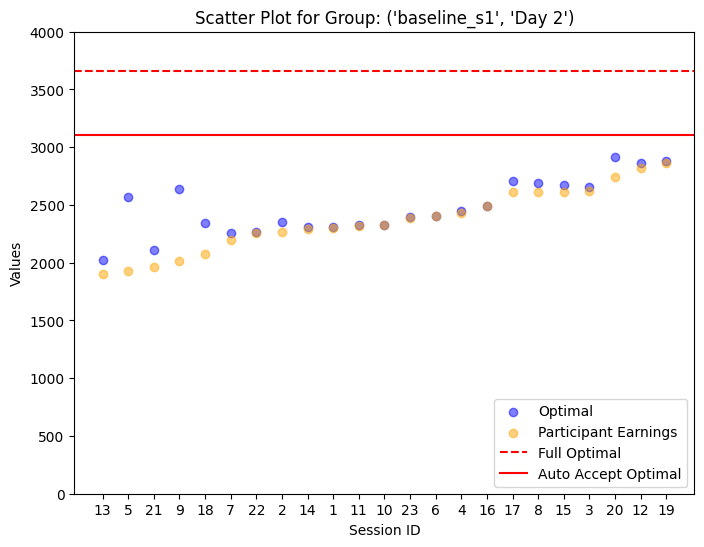

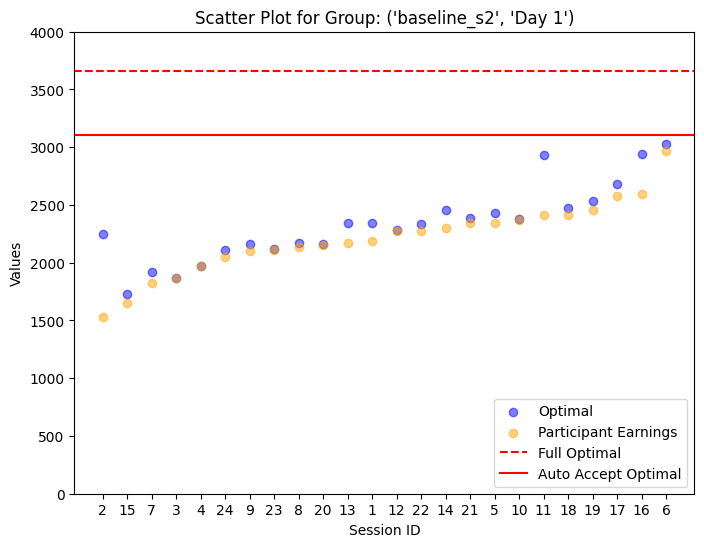

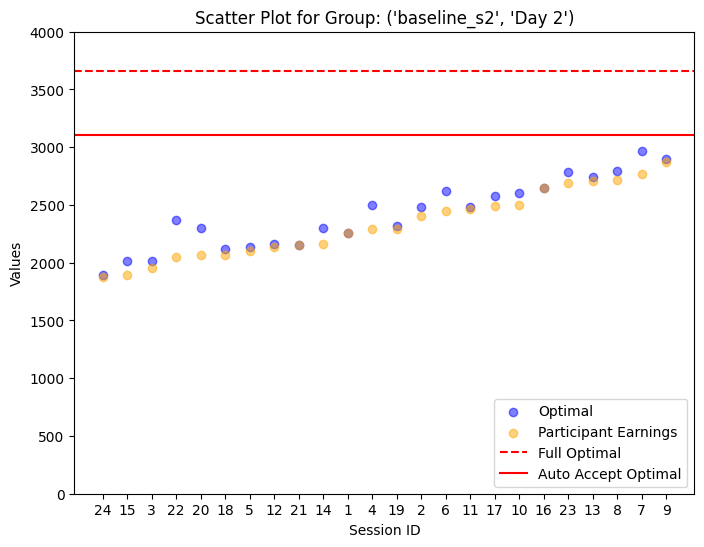

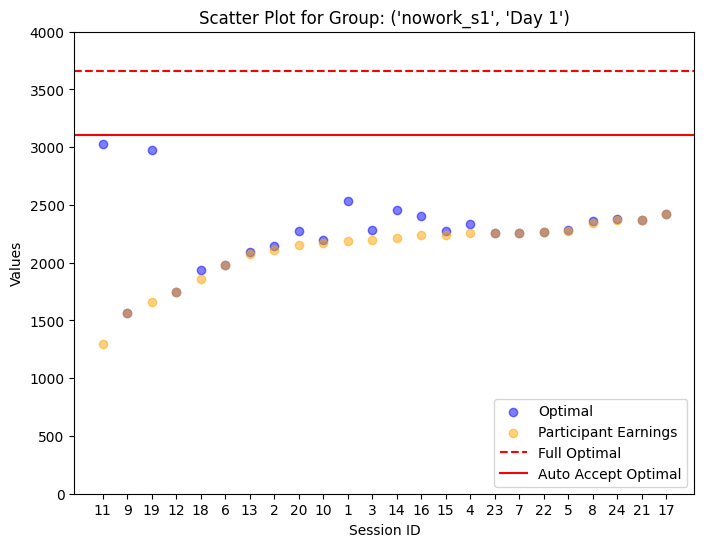

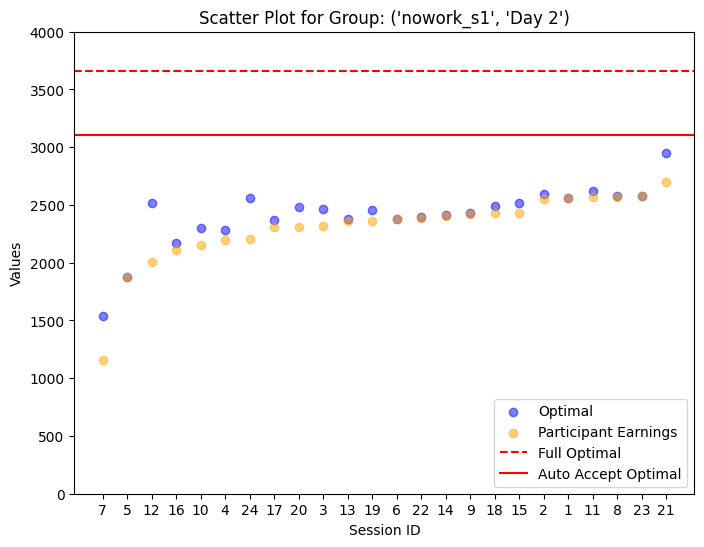

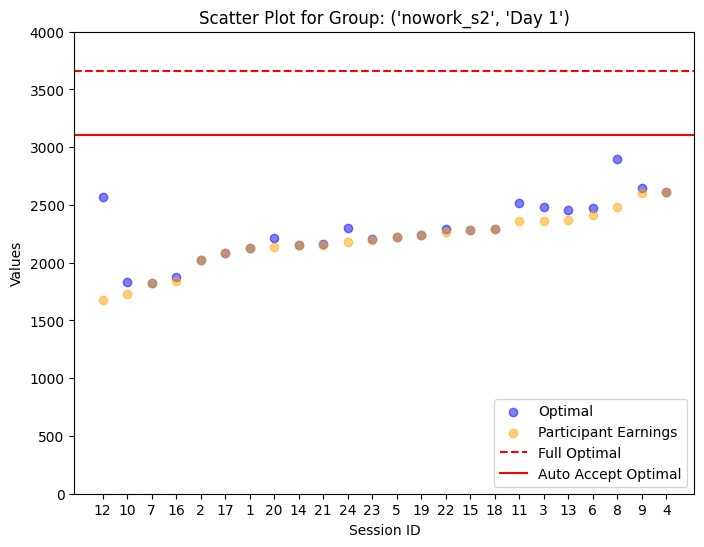

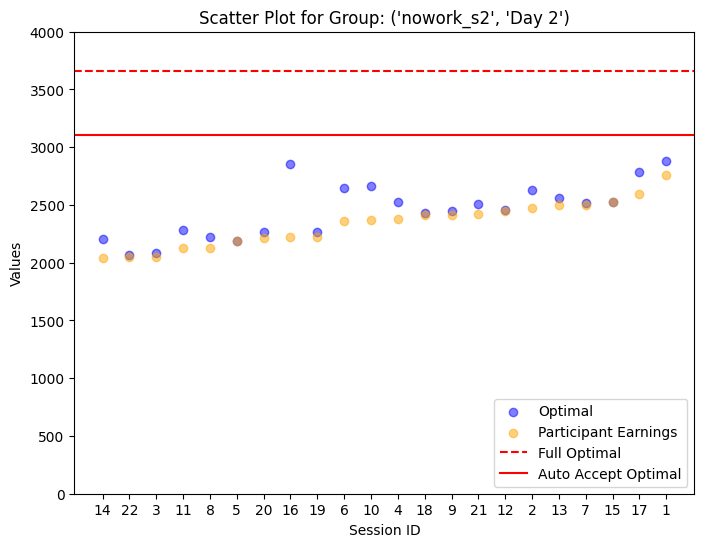

In [59]:
for (group_name, group_data) in group_other:
    # Create a scatter plot for each group
    plt.figure(figsize=(8, 6))
    group_data['session_id'] = group_data['session_id'].astype(str)
    group_data=group_data.sort_values(by='Participant_Earnings')
    
    # Plot 'Optimal' against 'session_id'
    plt.scatter(group_data['session_id'], group_data['Optimal'], alpha=0.5, label='Optimal', color='blue', marker='o')
    
    # Plot 'Participant_earnings' against 'session_id'
    plt.scatter(group_data['session_id'], group_data['Participant_Earnings'], alpha=0.5, label='Participant Earnings', color='orange', marker='o')
    
    # Set plot title and labels
    plt.axhline(y=3658, color='red', linestyle='--', label='Full Optimal')
    plt.axhline(y=3110, color='red', linestyle='-', label='Auto Accept Optimal')
    plt.title(f'Scatter Plot for Group: {group_name}')
    plt.xlabel('Session ID')
    plt.ylim(0,4000)
    plt.ylabel('Values')
    plt.legend(loc='lower right')  # Add a legend to distinguish between the two plots

    # Save the plot or display it
    plt.show()

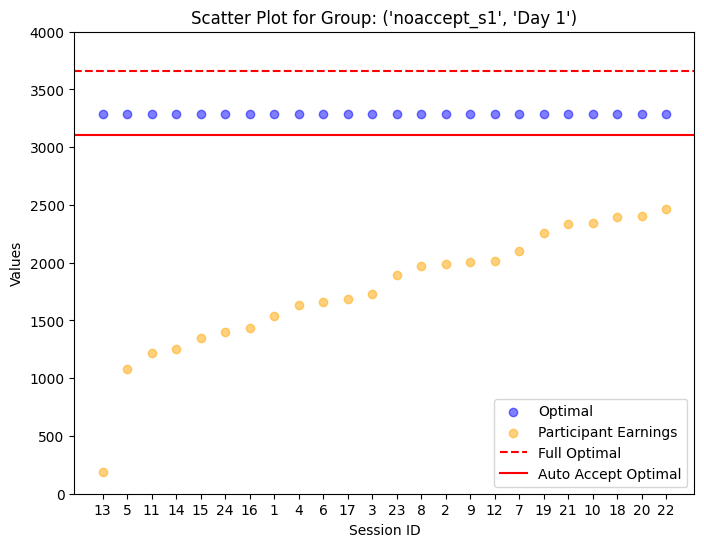

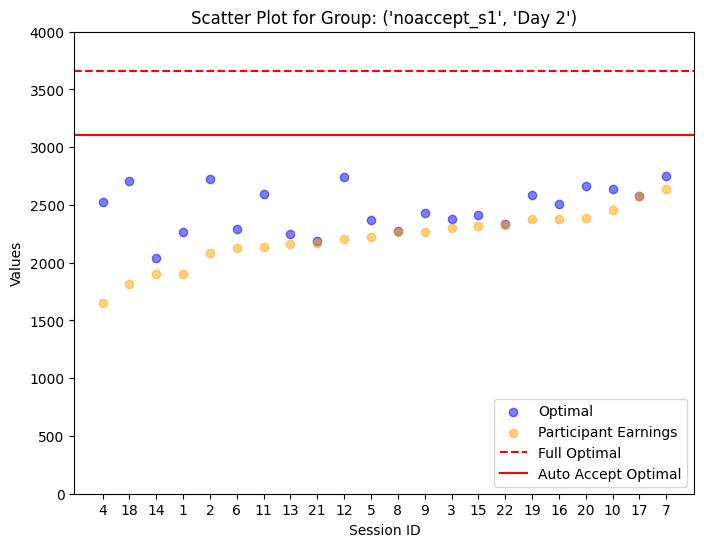

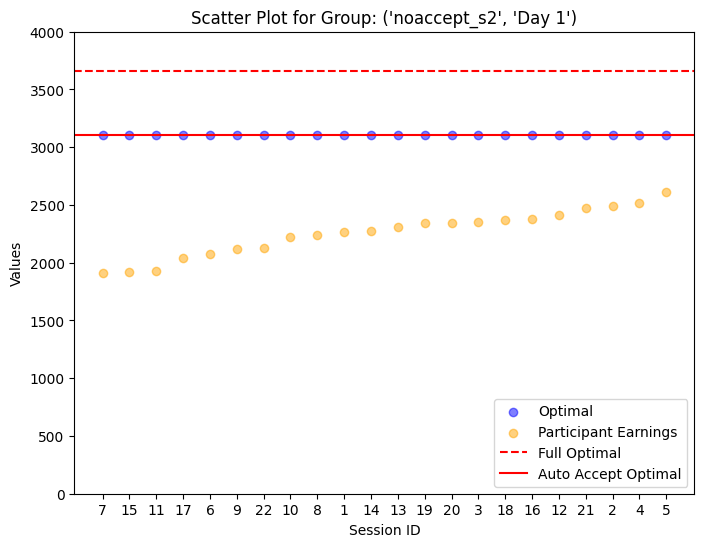

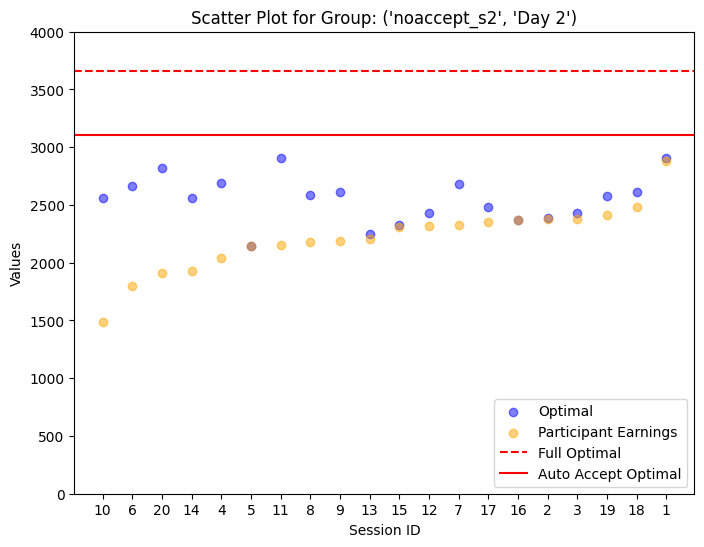

In [60]:
for (group_name, group_data) in group_auto:
    # Create a scatter plot for each group
    plt.figure(figsize=(8, 6))
    group_data['session_id'] = group_data['session_id'].astype(str)
    group_data=group_data.sort_values(by='Participant_Earnings')
    
    # Plot 'Optimal' against 'session_id'
    plt.scatter(group_data['session_id'], group_data['Optimal'], alpha=0.5, label='Optimal', color='blue', marker='o')
    
    # Plot 'Participant_earnings' against 'session_id'
    plt.scatter(group_data['session_id'], group_data['Participant_Earnings'], alpha=0.5, label='Participant Earnings', color='orange', marker='o')
    
    # Set plot title and labels
    plt.axhline(y=3658, color='red', linestyle='--', label='Full Optimal')
    plt.axhline(y=3110, color='red', linestyle='-', label='Auto Accept Optimal')
    plt.title(f'Scatter Plot for Group: {group_name}')
    plt.xlabel('Session ID')
    plt.ylim(0,4000)
    plt.ylabel('Values')
    plt.legend(loc='lower right')  # Add a legend to distinguish between the two plots

    # Save the plot or display it
    plt.show()

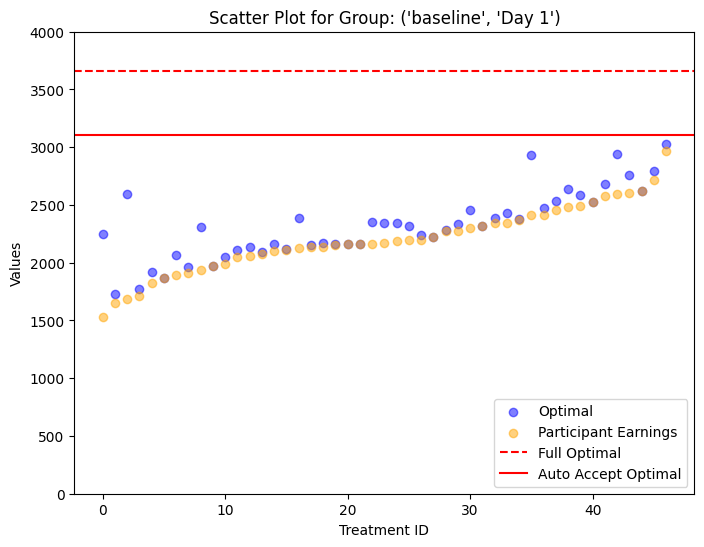

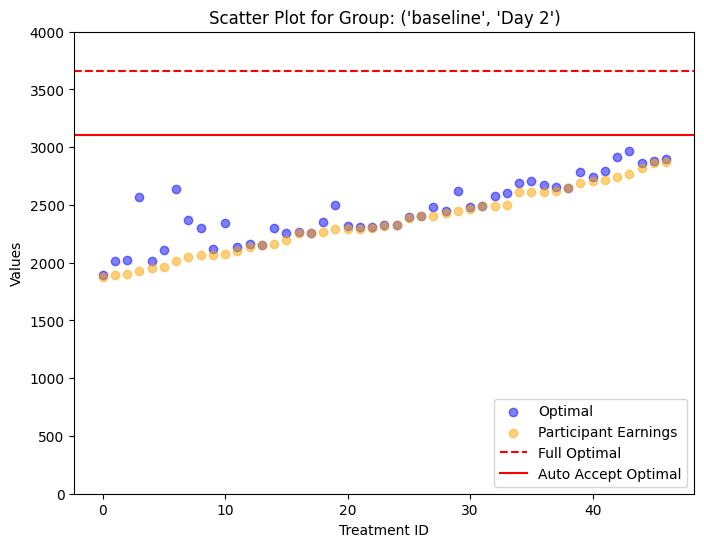

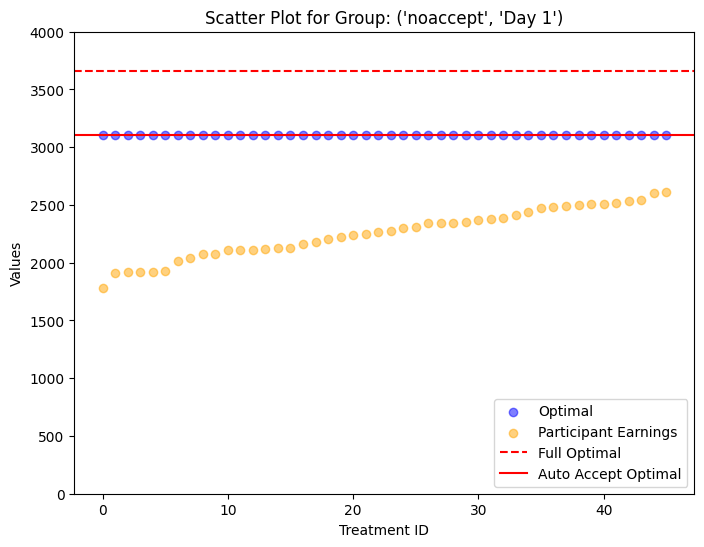

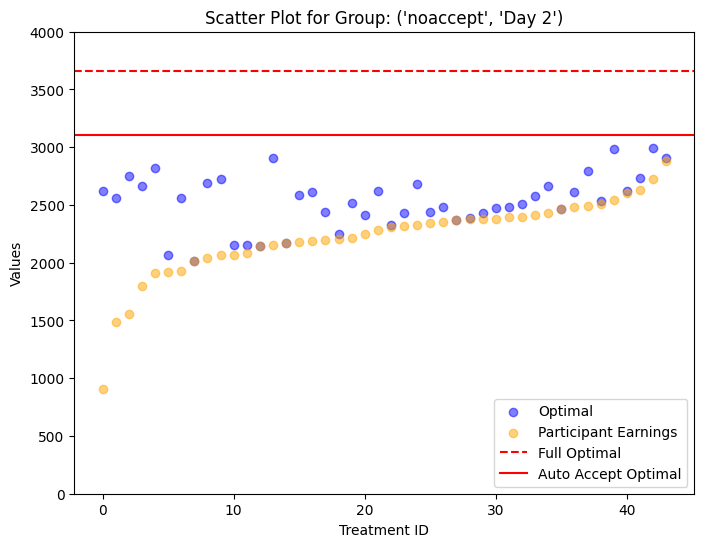

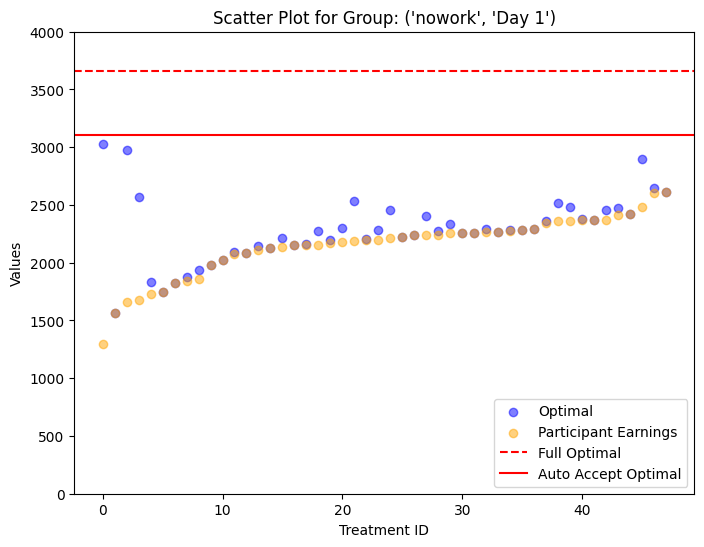

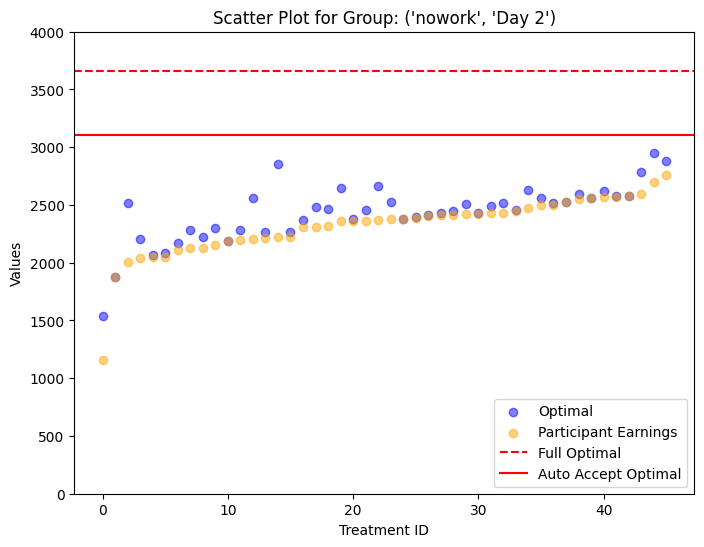

In [10]:
group_total=total_data.groupby(['Treatment','Day'])
for (group_name, group_data) in group_total:
    # Create a scatter plot for each group
    plt.figure(figsize=(8, 6))
    group_data['session_id'] = group_data['session_id'].astype(str)
    group_data=group_data.sort_values(by='Participant_Earnings')
    
    # Plot 'Optimal' against 'session_id'
    plt.scatter(range(len(group_data['session_id'])), group_data['Optimal'], alpha=0.5, label='Optimal', color='blue', marker='o')
    
    # Plot 'Participant_earnings' against 'session_id'
    plt.scatter(range(len(group_data['session_id'])), group_data['Participant_Earnings'], alpha=0.5, label='Participant Earnings', color='orange', marker='o')
    
    # Set plot title and labels
    plt.axhline(y=3658, color='red', linestyle='--', label='Full Optimal')
    plt.axhline(y=3110, color='red', linestyle='-', label='Auto Accept Optimal')
    plt.title(f'Scatter Plot for Group: {group_name}')
    plt.xlabel('Treatment ID')
    plt.ylim(0,4000)
    plt.ylabel('Values')
    plt.legend(loc='lower right')  # Add a legend to distinguish between the two plots

    # Save the plot or display it
    plt.show()

In [11]:
full_data=total_data

In [12]:
full_data=full_data.rename(columns={'Efficiency':'Work_Efficiency'})


In [13]:
full_data['Percent_of_Optimal']= full_data['Participant_Earnings']/3658
full_data

,Group,Day,session_id,Optimal,Participant_Earnings,Treatment,Work_Efficiency,Percent_of_Optimal
0,baseline_s1,Day 1,1,2071.0,1895.0,baseline,0.915017,0.518043
1,baseline_s1,Day 1,2,2310.0,1940.0,baseline,0.839827,0.530344
2,baseline_s1,Day 1,3,2623.0,2617.0,baseline,0.997713,0.715418
3,baseline_s1,Day 1,4,2530.0,2522.0,baseline,0.996838,0.689448
4,baseline_s1,Day 1,5,2161.0,2161.0,baseline,1.000000,0.590760
...,...,...,...,...,...,...,...,...
273,nowork_s2,Day 2,18,2430.0,2411.0,nowork,0.992181,0.659103
274,nowork_s2,Day 2,19,2264.0,2224.0,nowork,0.982332,0.607983
275,nowork_s2,Day 2,20,2269.0,2217.0,nowork,0.977082,0.606069
276,nowork_s2,Day 2,21,2509.0,2423.0,nowork,0.965723,0.662384


In [14]:
full_data.to_csv('efficiency_data.csv')